In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset and display its attributes

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.keys())
print(diabetes['DESCR'])

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source U

## Use Sklearn linear regression to fit a model between BMI and disease progression 

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


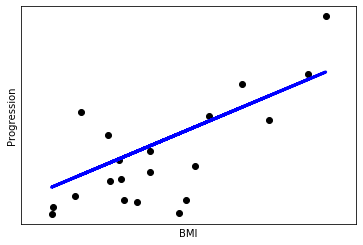

In [4]:
# Use one feature (BMI)
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('BMI') 
plt.ylabel('Progression') 
plt.show()


## Use numpy to do the same thing

In [5]:
def get_MSE(y,y_pred):
    '''
    Takes the Ground truth and prediction arrays as input and outputs the mean squared error between them
    '''
    return np.square(np.subtract(y,y_pred)).mean() 

we end up with the following equation: Y = 938.2378612512633X + 152.91886182616167


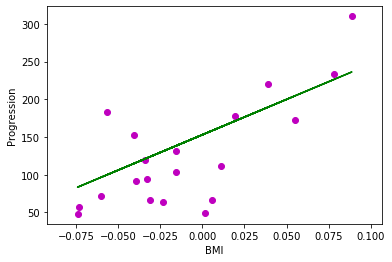

The mean squared error is:  2548.0723987259703


In [9]:
# def estimate_coef(x, y): 
    # number of observations/points 

# Use one feature (BMI)
diabetes_X = diabetes.data[:, 2]

# Split the data into training/testing sets
X_train = diabetes_X[:-20]
X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]
    


n = np.size(X_train) 
  
# mean of x and y vector 
m_x, m_y = np.mean(X_train), np.mean(y_train) 

# calculating cross-deviation and deviation about x 

SS_xy = np.sum(X_train*y_train - X_train*m_y - m_x*y_train) +n*m_x*m_y 
SS_xx = np.sum(X_train*X_train -2*m_x*X_train) + n*m_x*m_x 
# calculating regression coefficients 
m = SS_xy / SS_xx 
b = (np.sum(y_train) - m *np.sum(X_train)) / len(X_train)

print('we end up with the following equation: Y = {}X + {}'.format(m,b))

plt.scatter(X_test, y_test, color = "m", marker = "o") 

# predicted response vector 
y_pred = b + m*X_test 

# plotting the regression line 
plt.plot(X_test, y_pred, color = "g") 

# putting labels 
plt.xlabel('BMI') 
plt.ylabel('Progression') 

plt.show() 
  
MSE = get_MSE(y_test,y_pred)
print('The mean squared error is: ', MSE)
  



## Multivariate Linear regression

In [ ]:
# Use multiple features (BMI and S1)
diabetes_X = diabetes.data[:, [2,4]]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot outputs
# plt.scatter(diabetes_X_test[:,0], diabetes_y_test,  color='black')
# plt.scatter(diabetes_X_test[:,0], diabetes_y_test,  color='red')


 
# plt.show()


## Task: use more features 

## Gradient decent

In [ ]:
diabetes_X = diabetes.data[:, 2]

# Split the data into training/testing sets
X_train = diabetes_X[:-20]
X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]



# Building the model
m = 0
c = 0

L = 0.5  # The learning Rate
epochs = 1500  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X_train * (y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print ('We end up with the following equation Y = {}X + {}'.format(m, c))

Y_pred = m*X_test + c
plt.scatter(X_test, y_test) 
plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()
print ('the MSE is {}'.format(get_MSE(y_test,Y_pred)))